Importing Libraries

In [881]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

Loading Data

In [882]:
data = pd.read_csv('winequality-red.csv')

Data Collection

In [883]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [884]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [885]:
data.shape

(1599, 12)

In [886]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [887]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [888]:
#Removing outliers
def detect_outliers(data):
    outliers = []
    for feature in data.columns[:-1]:  # Skip the target column
        Q1 = np.percentile(data[feature], 25)
        Q3 = np.percentile(data[feature], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers.extend(data[(data[feature] < lower_bound) | (data[feature] > upper_bound)].index)
    return np.unique(outliers)

# Detect outliers
outlier_indices = detect_outliers(data)

# Drop the outliers
data_cleaned = data.drop(index=outlier_indices)

# Reset the index
data_cleaned.reset_index(drop=True, inplace=True)

print(f"Original number of samples: {data.shape[0]}")
print(f"Number of outliers detected: {len(outlier_indices)}")
print(f"Number of samples after removing outliers: {data_cleaned.shape[0]}")

data=data_cleaned

Original number of samples: 1599
Number of outliers detected: 405
Number of samples after removing outliers: 1194


Data analysis and Visualisation

In [889]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000
mean,8.166583,0.522735,0.248124,2.185762,0.078477,15.005863,42.154941,0.996571,3.324012,0.632194,10.365271,5.640704
std,1.461136,0.164879,0.180208,0.442160,0.014300,8.819079,26.084786,0.001604,0.132131,0.116196,0.975622,0.766471
min,5.100000,0.120000,0.000000,1.200000,0.041000,1.000000,6.000000,0.992350,2.940000,0.330000,8.700000,3.000000
25%,7.100000,0.390000,0.080000,1.900000,0.069000,8.000000,22.000000,0.995503,3.230000,0.550000,9.500000,5.000000
50%,7.800000,0.520000,0.240000,2.100000,0.078000,13.000000,36.000000,0.996600,3.325000,0.610000,10.100000,6.000000
75%,9.000000,0.630000,0.390000,2.500000,0.087000,20.000000,55.750000,0.997595,3.407500,0.700000,11.000000,6.000000
max,12.300000,1.005000,0.730000,3.600000,0.119000,42.000000,122.000000,1.001000,3.680000,0.980000,13.400000,8.000000


In [890]:
data['quality'].value_counts()

quality
5    513
6    498
7    135
4     33
8     12
3      3
Name: count, dtype: int64

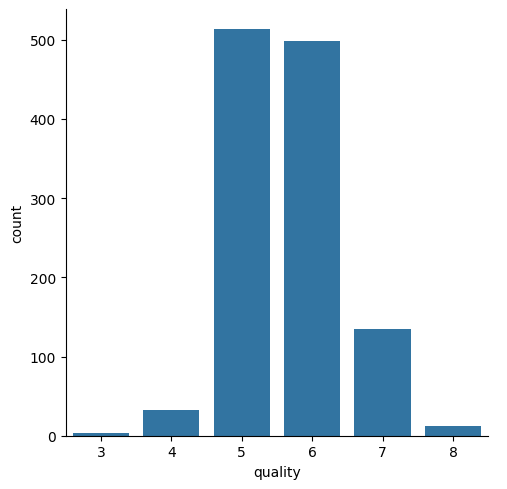

In [891]:
sns.catplot(x='quality', data=data, kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

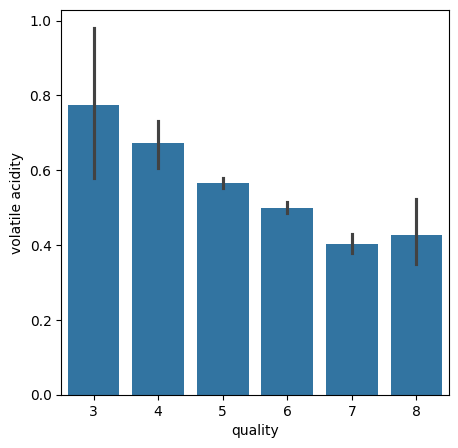

In [892]:
#Volatile Acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data=data)

<Axes: xlabel='quality', ylabel='alcohol'>

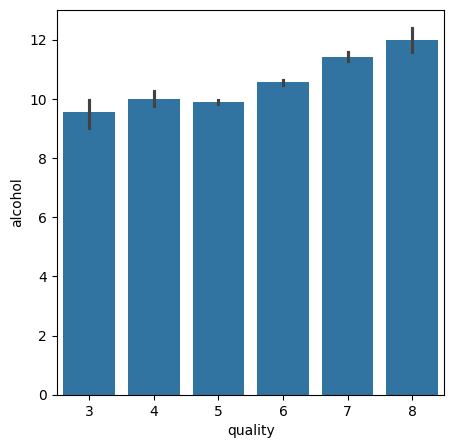

In [893]:
#Alcohol vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='alcohol',data=data)

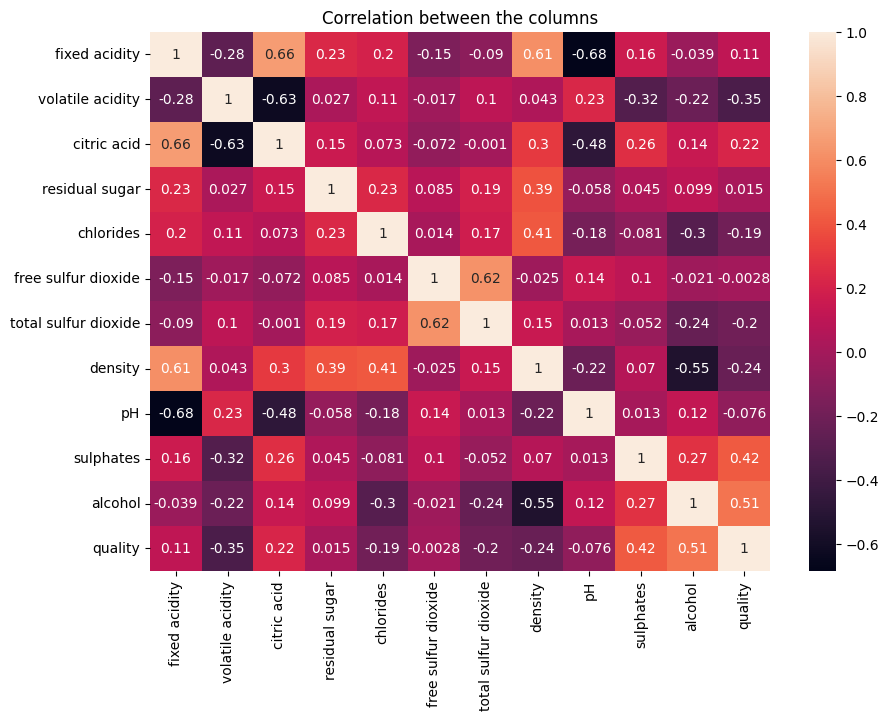

In [894]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

In [895]:
data.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.511374
sulphates               0.415356
citric acid             0.219897
fixed acidity           0.110671
residual sugar          0.015439
free sulfur dioxide    -0.002788
pH                     -0.075724
chlorides              -0.192271
total sulfur dioxide   -0.198539
density                -0.236333
volatile acidity       -0.352215
Name: quality, dtype: float64

Label Binarization

In [896]:
data['quality_binary'] = data['quality'].apply(lambda x: 1 if x >= 7 else 0)

In [897]:
X = data.drop(columns=['quality', 'quality_binary'])
y = data['quality_binary']

Standardizing Features

In [898]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Test and Train

In [899]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Applying Logistic Regression

In [900]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Function to train logistic regression model with L2 regularization
def train_logistic_regression(X, y, learning_rate=0.01, n_iterations=5000, lambda_reg=0.1):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0

    for _ in range(n_iterations):
        linear_model = np.dot(X, weights) + bias
        y_predicted = sigmoid(linear_model)

        dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y)) + (lambda_reg / n_samples) * weights
        db = (1 / n_samples) * np.sum(y_predicted - y)

        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias

# Function to make predictions
def predict_logistic_regression(X, weights, bias):
    linear_model = np.dot(X, weights) + bias
    y_predicted = sigmoid(linear_model)
    y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
    return y_predicted_cls


In [901]:
weights, bias = train_logistic_regression(X_train, y_train, learning_rate=0.01, n_iterations=5000,lambda_reg=0.1)

Prediction and Accuracy

In [902]:
test_predictions = predict_logistic_regression(X_test, weights, bias)
train_predictions = predict_logistic_regression(X_train, weights, bias)

In [903]:
train_accuracy = accuracy_score(y_train, train_predictions) * 100
test_accuracy = accuracy_score(y_test, test_predictions) * 100
print(f'Training Accuracy: {train_accuracy:.2f}%')
print(f'Test Accuracy: {test_accuracy:.2f}%')

Training Accuracy: 90.79%
Test Accuracy: 87.87%


In [904]:
'''#epoch vs loss
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Function to train logistic regression model and capture loss
def train_logistic_regression(X, y, learning_rate=0.01, n_iterations=1000):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    losses = []

    for _ in range(n_iterations):
        linear_model = np.dot(X, weights) + bias
        y_predicted = sigmoid(linear_model)

        # Calculate loss
        loss = -np.mean(y * np.log(y_predicted) + (1 - y) * np.log(1 - y_predicted))
        losses.append(loss)

        # Compute gradients
        dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
        db = (1 / n_samples) * np.sum(y_predicted - y)

        # Update parameters
        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias, losses

# Generate some synthetic data for demonstration
np.random.seed(0)
X = np.random.randn(100, 5)  # Example: 100 samples, 5 features
y = np.random.randint(0, 2, size=100)  # Binary labels

# Train the logistic regression model and get weights, bias, and losses
# Train the logistic regression model and get weights, bias, and losses
weights, bias, losses = train_logistic_regression(X_train, y_train, learning_rate=0.01, n_iterations=5000)

# Plot loss vs epoch (iteration)
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(losses) + 1), losses, marker='o', linestyle='-', color='b', label='Training Loss')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show() '''

"#epoch vs loss\ndef sigmoid(z):\n    return 1 / (1 + np.exp(-z))\n\n# Function to train logistic regression model and capture loss\ndef train_logistic_regression(X, y, learning_rate=0.01, n_iterations=1000):\n    n_samples, n_features = X.shape\n    weights = np.zeros(n_features)\n    bias = 0\n    losses = []\n\n    for _ in range(n_iterations):\n        linear_model = np.dot(X, weights) + bias\n        y_predicted = sigmoid(linear_model)\n\n        # Calculate loss\n        loss = -np.mean(y * np.log(y_predicted) + (1 - y) * np.log(1 - y_predicted))\n        losses.append(loss)\n\n        # Compute gradients\n        dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))\n        db = (1 / n_samples) * np.sum(y_predicted - y)\n\n        # Update parameters\n        weights -= learning_rate * dw\n        bias -= learning_rate * db\n\n    return weights, bias, losses\n\n# Generate some synthetic data for demonstration\nnp.random.seed(0)\nX = np.random.randn(100, 5)  # Example: 100 samp